In [18]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [19]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9aSkuMDufRQ-_cGNUoBz7Lt6oBI_rXUiZ_yao-U4oncs',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'flightdelayprediction-donotdelete-pr-ocgt3z2vhznocj'
object_key = 'flightdata2.xlsx'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
df= pd.read_excel(body.read())

In [20]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,ARR_TIME.1,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME1,ACTUAL_ELAPSED_TIME1,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2102.0,-41.0,0.0,0,0,05:38:00,04:55:00,338,295.0,2182
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1439.0,4.0,0.0,0,0,01:50:00,01:55:00,110,115.0,528
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1142.0,-33.0,0.0,0,0,05:35:00,05:00:00,335,300.0,2182
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1345.0,10.0,0.0,0,0,03:16:00,03:25:00,196,205.0,1399
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,615.0,8.0,0.0,0,0,04:07:00,04:19:00,247,259.0,1927


In [21]:
from datetime import datetime


In [22]:
import datetime as dt

In [23]:
from datetime import datetime

In [61]:
pwd

'/home/wsuser/work'

In [24]:
df.shape

(11231, 31)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YEAR                  11231 non-null  int64  
 1   QUARTER               11231 non-null  int64  
 2   MONTH                 11231 non-null  int64  
 3   DAY_OF_MONTH          11231 non-null  int64  
 4   DAY_OF_WEEK           11231 non-null  int64  
 5   UNIQUE_CARRIER        11231 non-null  object 
 6   TAIL_NUM              11231 non-null  object 
 7   FL_NUM                11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID     11231 non-null  int64  
 9   ORIGIN                11231 non-null  object 
 10  DEST_AIRPORT_ID       11231 non-null  int64  
 11  DEST                  11231 non-null  object 
 12  CRS_DEP_TIME          11231 non-null  object 
 13  CRS_DEP_TIME.1        11231 non-null  int64  
 14  DEP_TIME              11124 non-null  object 
 15  DEP_TIME.1         

In [26]:
df.isnull().any()

YEAR                    False
QUARTER                 False
MONTH                   False
DAY_OF_MONTH            False
DAY_OF_WEEK             False
UNIQUE_CARRIER          False
TAIL_NUM                False
FL_NUM                  False
ORIGIN_AIRPORT_ID       False
ORIGIN                  False
DEST_AIRPORT_ID         False
DEST                    False
CRS_DEP_TIME            False
CRS_DEP_TIME.1          False
DEP_TIME                 True
DEP_TIME.1               True
DEP_DELAY                True
DEP_DEL15                True
CRS_ARR_TIME            False
CRS_ARR_TIME.1          False
ARR_TIME                 True
ARR_TIME.1               True
ARR_DELAY                True
ARR_DEL15                True
CANCELLED               False
DIVERTED                False
CRS_ELAPSED_TIME1       False
ACTUAL_ELAPSED_TIME1    False
CRS_ELAPSED_TIME        False
ACTUAL_ELAPSED_TIME      True
DISTANCE                False
dtype: bool

In [31]:
df['DEP_DELAY'].fillna(df['DEP_DELAY'].median(),inplace=True)

In [32]:
df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME.1,DEP_TIME.1,...,DEP_DEL15,CRS_ARR_TIME.1,ARR_TIME.1,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,0.141483,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,0.348535,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,0.000000,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,0.000000,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,0.000000,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,0.000000,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,1.000000,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000


In [33]:
df.ORIGIN.value_counts()

ATL    3100
MSP    2538
DTW    2201
SEA    2018
JFK    1374
Name: ORIGIN, dtype: int64

In [34]:
df.UNIQUE_CARRIER.value_counts()

DL    11231
Name: UNIQUE_CARRIER, dtype: int64

In [35]:
df.ORIGIN_AIRPORT_ID.value_counts()

10397    3100
13487    2538
11433    2201
14747    2018
12478    1374
Name: ORIGIN_AIRPORT_ID, dtype: int64

In [36]:
df.ORIGIN.unique()

array(['ATL', 'DTW', 'SEA', 'MSP', 'JFK'], dtype=object)

In [37]:
df.ORIGIN_AIRPORT_ID.unique()

array([10397, 11433, 14747, 13487, 12478])

In [38]:
df.UNIQUE_CARRIER.unique()

array(['DL'], dtype=object)

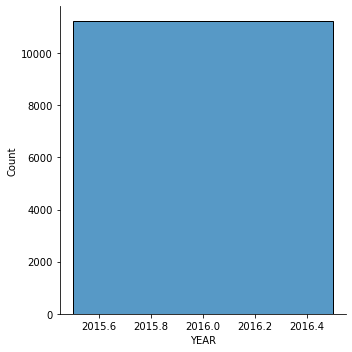

In [39]:
sns.displot(df.YEAR)

Text(0.5, 1.0, 'AIRPORT')

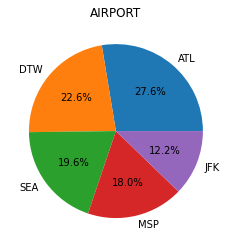

In [40]:
plt.pie(df.ORIGIN.value_counts(),labels=['ATL', 'DTW', 'SEA', 'MSP', 'JFK'],autopct="%1.1f%%")
plt.title('AIRPORT')

<AxesSubplot:ylabel='ORIGIN'>

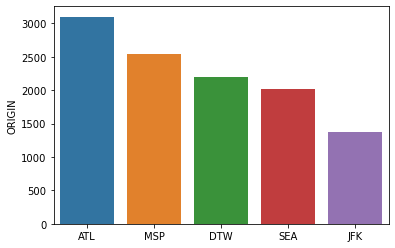

In [41]:
sns.barplot(df.ORIGIN.value_counts().index,df.ORIGIN.value_counts())

array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'QUARTER'}>,
        <AxesSubplot:title={'center':'MONTH'}>,
        <AxesSubplot:title={'center':'DAY_OF_MONTH'}>,
        <AxesSubplot:title={'center':'DAY_OF_WEEK'}>],
       [<AxesSubplot:title={'center':'FL_NUM'}>,
        <AxesSubplot:title={'center':'ORIGIN_AIRPORT_ID'}>,
        <AxesSubplot:title={'center':'DEST_AIRPORT_ID'}>,
        <AxesSubplot:title={'center':'CRS_DEP_TIME.1'}>,
        <AxesSubplot:title={'center':'DEP_TIME.1'}>],
       [<AxesSubplot:title={'center':'DEP_DELAY'}>,
        <AxesSubplot:title={'center':'DEP_DEL15'}>,
        <AxesSubplot:title={'center':'CRS_ARR_TIME.1'}>,
        <AxesSubplot:title={'center':'ARR_TIME.1'}>,
        <AxesSubplot:title={'center':'ARR_DELAY'}>],
       [<AxesSubplot:title={'center':'ARR_DEL15'}>,
        <AxesSubplot:title={'center':'CANCELLED'}>,
        <AxesSubplot:title={'center':'DIVERTED'}>,
        <AxesSubplot:title={'center':'CRS_ELA

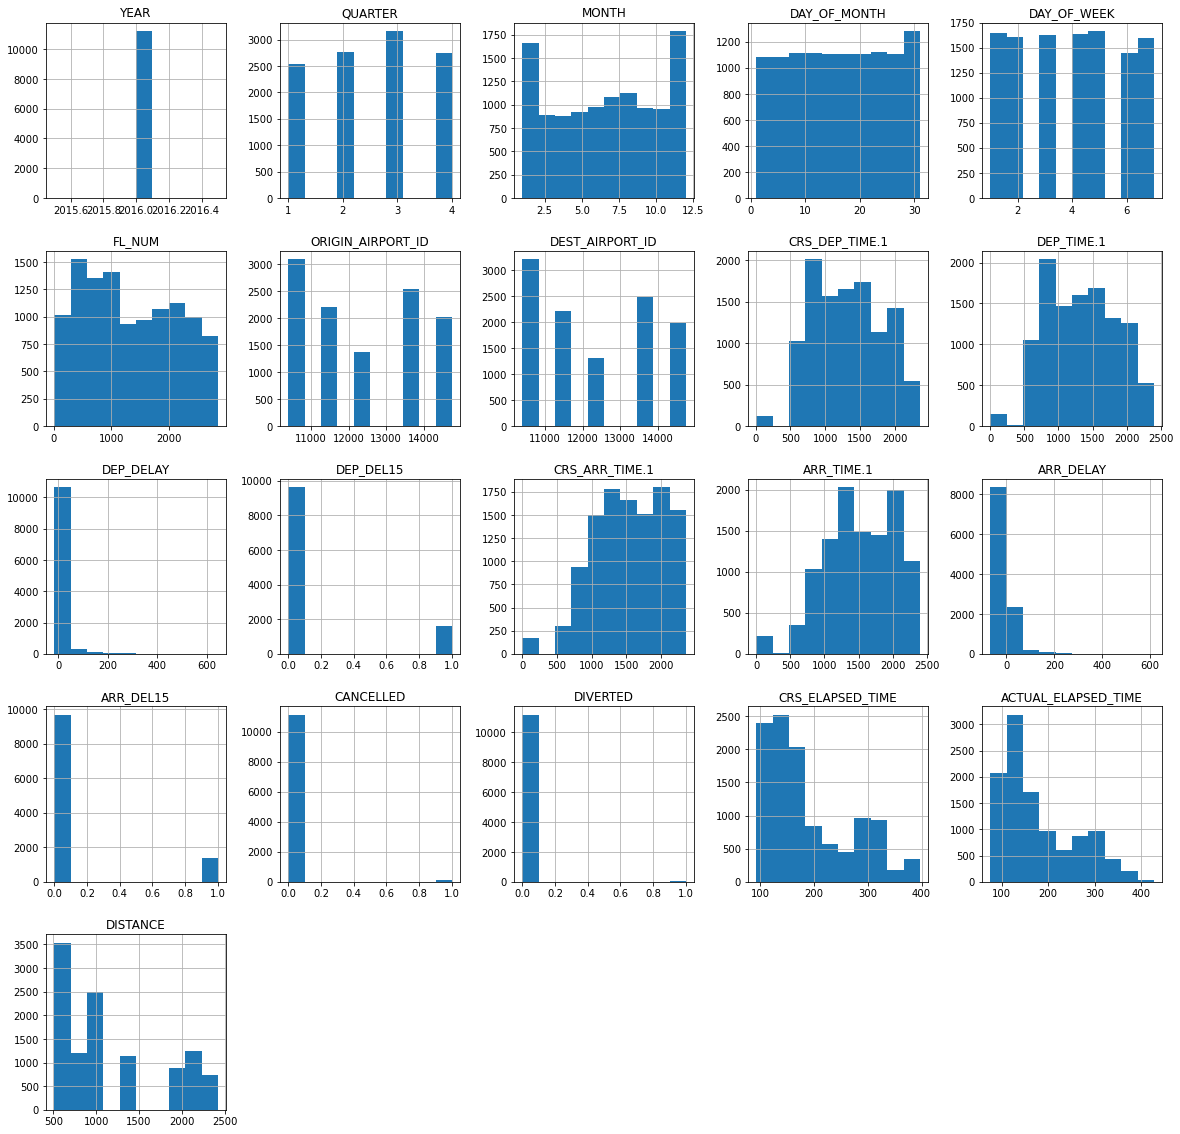

In [42]:
df.hist(figsize=(20,20))

<AxesSubplot:xlabel='QUARTER'>

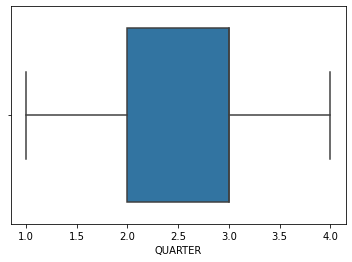

In [43]:
sns.boxplot(df.QUARTER)

<AxesSubplot:xlabel='MONTH'>

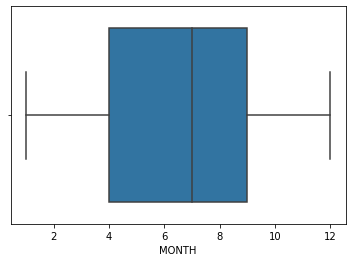

In [44]:
sns.boxplot(df.MONTH)

<AxesSubplot:xlabel='DAY_OF_MONTH'>

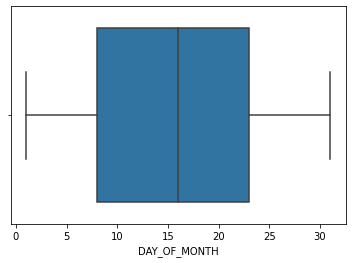

In [45]:
sns.boxplot(df.DAY_OF_MONTH)

<AxesSubplot:xlabel='FL_NUM'>

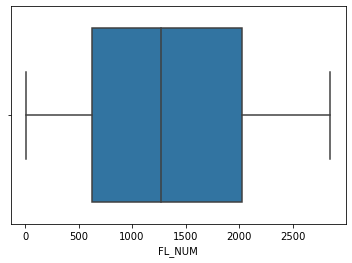

In [46]:
sns.boxplot(df.FL_NUM)

<AxesSubplot:xlabel='CANCELLED'>

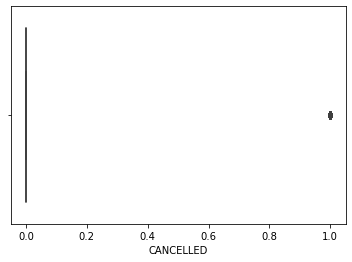

In [48]:
sns.boxplot(df.CANCELLED)

<AxesSubplot:xlabel='DIVERTED'>

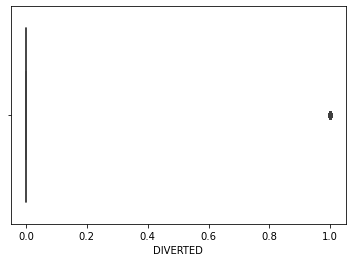

In [49]:
sns.boxplot(df.DIVERTED)

<AxesSubplot:xlabel='CRS_ELAPSED_TIME'>

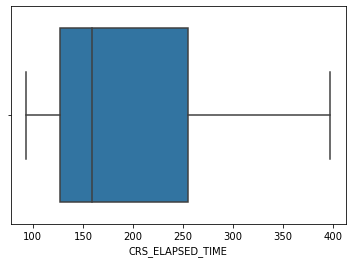

In [50]:
sns.boxplot(df.CRS_ELAPSED_TIME)

<AxesSubplot:xlabel='ACTUAL_ELAPSED_TIME'>

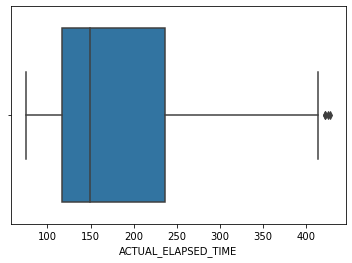

In [51]:
sns.boxplot(df.ACTUAL_ELAPSED_TIME)

<AxesSubplot:xlabel='DISTANCE'>

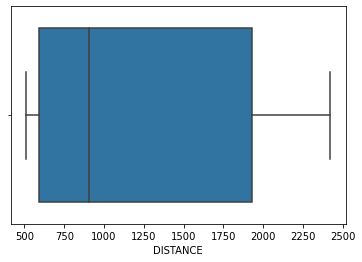

In [52]:
sns.boxplot(df.DISTANCE)

<AxesSubplot:xlabel='DEP_DELAY'>

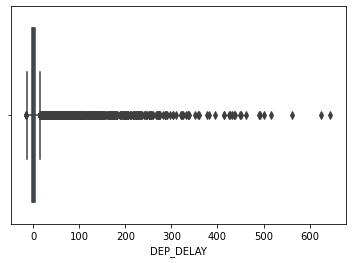

In [54]:
sns.boxplot(df.DEP_DELAY)

<AxesSubplot:xlabel='DEP_DEL15'>

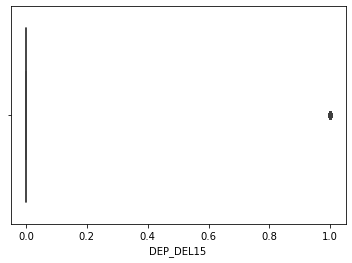

In [55]:
sns.boxplot(df.DEP_DEL15)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ARR_DELAY'>

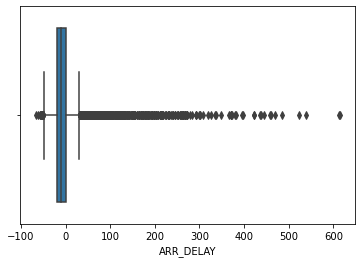

In [129]:
sns.boxplot(df.ARR_DELAY)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ARR_TIME'>

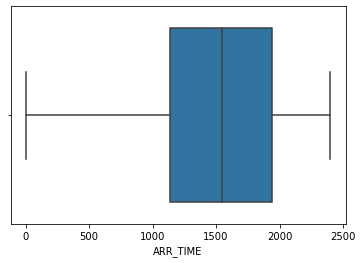

In [130]:
sns.boxplot(df.ARR_TIME)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ARR_DEL15'>

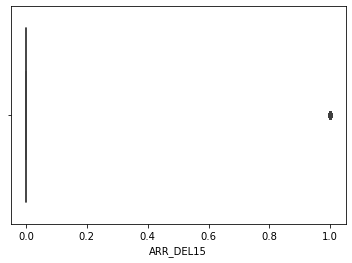

In [131]:
sns.boxplot(df.ARR_DEL15)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DAY_OF_WEEK'>

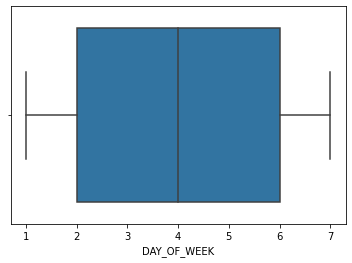

In [132]:
sns.boxplot(df.DAY_OF_WEEK)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ORIGIN_AIRPORT_ID'>

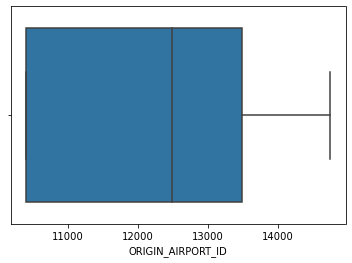

In [133]:
sns.boxplot(df.ORIGIN_AIRPORT_ID)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEST_AIRPORT_ID'>

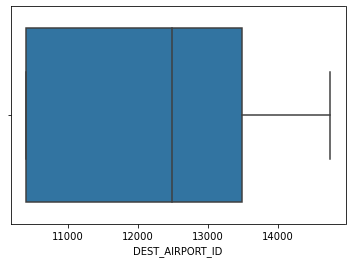

In [134]:
sns.boxplot(df.DEST_AIRPORT_ID)

In [56]:
df.groupby(by="DAY_OF_WEEK")["DEP_DEL15"].sum()

DAY_OF_WEEK
1    253.0
2    213.0
3    204.0
4    245.0
5    250.0
6    198.0
7    226.0
Name: DEP_DEL15, dtype: float64

In [57]:
df.groupby(by="MONTH")["DEP_DEL15"].sum()

MONTH
1     113.0
2     115.0
3     104.0
4      96.0
5      86.0
6     168.0
7     219.0
8     246.0
9      88.0
10     86.0
11     66.0
12    202.0
Name: DEP_DEL15, dtype: float64

In [58]:
df[df["ARR_DELAY"]>=300]

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,ARR_TIME.1,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME1,ACTUAL_ELAPSED_TIME1,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
202,2016,1,1,10,7,DL,N125DL,1893,11433,DTW,...,1615.0,326.0,1.0,0,0,02:14:00,02:36:00,134,156.0,594
565,2016,1,1,24,7,DL,N3753,463,12478,JFK,...,2127.0,470.0,1.0,0,0,02:37:00,02:15:00,157,135.0,760
1199,2016,1,2,16,2,DL,N935DL,86,13487,MSP,...,2140.0,300.0,1.0,0,0,01:45:00,01:24:00,105,84.0,528
1605,2016,1,2,24,3,DL,N983DL,1156,10397,ATL,...,218.0,371.0,1.0,0,0,02:27:00,03:18:00,147,198.0,760
2535,2016,1,3,18,5,DL,N809DN,2330,14747,SEA,...,246.0,615.0,1.0,0,0,04:46:00,04:16:00,286,256.0,2182
2723,2016,2,4,10,7,DL,N624AG,1336,14747,SEA,...,2317.0,437.0,1.0,0,0,05:11:00,04:59:00,311,299.0,2422
4814,2016,2,6,16,4,DL,N319NB,2816,12478,JFK,...,2318.0,301.0,1.0,0,0,03:22:00,02:48:00,202,168.0,1029
5336,2016,3,7,1,5,DL,N171DN,43,12478,JFK,...,27.0,374.0,1.0,0,0,02:48:00,03:27:00,168,207.0,760
5340,2016,3,7,1,5,DL,N355NB,2214,13487,MSP,...,307.0,335.0,1.0,0,0,02:57:00,03:10:00,177,190.0,1029
5378,2016,3,7,1,5,DL,N377NW,984,10397,ATL,...,604.0,380.0,1.0,0,0,02:29:00,01:54:00,149,114.0,760


In [59]:
sm=[6,7,8]
wt=[9,10,11]
sp=[12,1,2,3]
fl=[4,5]

In [60]:
df["SEASON"]=np.where(df["MONTH"].isin(sm),0,np.where(df["MONTH"].isin(wt),1,np.where(df["MONTH"].isin(sp),2,3)))

In [61]:
df["SEASON"].value_counts()

2    3441
0    3184
1    2808
3    1798
Name: SEASON, dtype: int64

In [141]:
#Encoding categorial columns into numerical

In [62]:
df["CANCELLED"]=np.where(df["CANCELLED"]==1,4,0)

In [63]:
df["DIVERTED"]=np.where(df["DIVERTED"]==1,3,0)

In [64]:
df.CANCELLED.unique(),df.DIVERTED.unique()

(array([0, 4]), array([0, 3]))

In [65]:
df["DELAY_15"]=df["ARR_DEL15"]+df["DEP_DEL15"]
df.DELAY_15.unique()

array([ 0.,  1.,  2., nan])

In [66]:
df["DELAY_15"].fillna(0,inplace=True)
df.DELAY_15.unique()

array([0., 1., 2.])

In [67]:
df["NDELAY"]=df["DELAY_15"]+df["CANCELLED"]+df["DIVERTED"]

In [68]:
df.NDELAY.unique()

array([0., 1., 2., 3., 4.])

In [69]:
len(df["TAIL_NUM"].value_counts()),len(df["FL_NUM"].value_counts())

(789, 690)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YEAR                  11231 non-null  int64  
 1   QUARTER               11231 non-null  int64  
 2   MONTH                 11231 non-null  int64  
 3   DAY_OF_MONTH          11231 non-null  int64  
 4   DAY_OF_WEEK           11231 non-null  int64  
 5   UNIQUE_CARRIER        11231 non-null  object 
 6   TAIL_NUM              11231 non-null  object 
 7   FL_NUM                11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID     11231 non-null  int64  
 9   ORIGIN                11231 non-null  object 
 10  DEST_AIRPORT_ID       11231 non-null  int64  
 11  DEST                  11231 non-null  object 
 12  CRS_DEP_TIME          11231 non-null  object 
 13  CRS_DEP_TIME.1        11231 non-null  int64  
 14  DEP_TIME              11124 non-null  object 
 15  DEP_TIME.1         

In [71]:
#Drop unnecessary columns
clm=["YEAR","UNIQUE_CARRIER","DEP_TIME","DEP_DELAY","DEP_DEL15","ARR_TIME","ARR_DELAY","ARR_DEL15","CANCELLED","DIVERTED",
    "ACTUAL_ELAPSED_TIME","DELAY_15"]
df1=df.drop(columns=clm)
df1.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,...,DEP_TIME.1,CRS_ARR_TIME,CRS_ARR_TIME.1,ARR_TIME.1,CRS_ELAPSED_TIME1,ACTUAL_ELAPSED_TIME1,CRS_ELAPSED_TIME,DISTANCE,SEASON,NDELAY
0,1,1,1,5,N836DN,1399,10397,ATL,14747,SEA,...,1907.0,21:43:00,2143,2102.0,05:38:00,04:55:00,338,2182,2,0.0
1,1,1,1,5,N964DN,1476,11433,DTW,13487,MSP,...,1344.0,14:35:00,1435,1439.0,01:50:00,01:55:00,110,528,2,0.0
2,1,1,1,5,N813DN,1597,10397,ATL,14747,SEA,...,942.0,12:15:00,1215,1142.0,05:35:00,05:00:00,335,2182,2,0.0
3,1,1,1,5,N587NW,1768,14747,SEA,13487,MSP,...,820.0,13:35:00,1335,1345.0,03:16:00,03:25:00,196,1399,2,0.0
4,1,1,1,5,N836DN,1823,14747,SEA,11433,DTW,...,2256.0,06:07:00,607,615.0,04:07:00,04:19:00,247,1927,2,0.0


In [72]:
df1.dropna(how='all',axis=1)

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,...,DEP_TIME.1,CRS_ARR_TIME,CRS_ARR_TIME.1,ARR_TIME.1,CRS_ELAPSED_TIME1,ACTUAL_ELAPSED_TIME1,CRS_ELAPSED_TIME,DISTANCE,SEASON,NDELAY
0,1,1,1,5,N836DN,1399,10397,ATL,14747,SEA,...,1907.0,21:43:00,2143,2102.0,05:38:00,04:55:00,338,2182,2,0.0
1,1,1,1,5,N964DN,1476,11433,DTW,13487,MSP,...,1344.0,14:35:00,1435,1439.0,01:50:00,01:55:00,110,528,2,0.0
2,1,1,1,5,N813DN,1597,10397,ATL,14747,SEA,...,942.0,12:15:00,1215,1142.0,05:35:00,05:00:00,335,2182,2,0.0
3,1,1,1,5,N587NW,1768,14747,SEA,13487,MSP,...,820.0,13:35:00,1335,1345.0,03:16:00,03:25:00,196,1399,2,0.0
4,1,1,1,5,N836DN,1823,14747,SEA,11433,DTW,...,2256.0,06:07:00,607,615.0,04:07:00,04:19:00,247,1927,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,4,12,30,5,N940DL,1715,11433,DTW,10397,ATL,...,1003.0,12:23:00,1223,1148.0,02:18:00,01:45:00,138,594,2,0.0
11227,4,12,30,5,N836DN,1770,14747,SEA,13487,MSP,...,1559.0,20:46:00,2046,2100.0,03:21:00,03:01:00,201,1399,2,1.0
11228,4,12,30,5,N583NW,1823,11433,DTW,14747,SEA,...,1959.0,22:10:00,2210,2154.0,05:11:00,04:55:00,311,1927,2,0.0
11229,4,12,30,5,N554NW,1901,10397,ATL,14747,SEA,...,1529.0,18:06:00,1806,1801.0,05:36:00,05:32:00,336,2182,2,0.0


In [73]:
df1.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,...,DEP_TIME.1,CRS_ARR_TIME,CRS_ARR_TIME.1,ARR_TIME.1,CRS_ELAPSED_TIME1,ACTUAL_ELAPSED_TIME1,CRS_ELAPSED_TIME,DISTANCE,SEASON,NDELAY
0,1,1,1,5,N836DN,1399,10397,ATL,14747,SEA,...,1907.0,21:43:00,2143,2102.0,05:38:00,04:55:00,338,2182,2,0.0
1,1,1,1,5,N964DN,1476,11433,DTW,13487,MSP,...,1344.0,14:35:00,1435,1439.0,01:50:00,01:55:00,110,528,2,0.0
2,1,1,1,5,N813DN,1597,10397,ATL,14747,SEA,...,942.0,12:15:00,1215,1142.0,05:35:00,05:00:00,335,2182,2,0.0
3,1,1,1,5,N587NW,1768,14747,SEA,13487,MSP,...,820.0,13:35:00,1335,1345.0,03:16:00,03:25:00,196,1399,2,0.0
4,1,1,1,5,N836DN,1823,14747,SEA,11433,DTW,...,2256.0,06:07:00,607,615.0,04:07:00,04:19:00,247,1927,2,0.0


In [74]:
df2=df1.drop(columns=["TAIL_NUM","FL_NUM"])

In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   QUARTER               11231 non-null  int64  
 1   MONTH                 11231 non-null  int64  
 2   DAY_OF_MONTH          11231 non-null  int64  
 3   DAY_OF_WEEK           11231 non-null  int64  
 4   ORIGIN_AIRPORT_ID     11231 non-null  int64  
 5   ORIGIN                11231 non-null  object 
 6   DEST_AIRPORT_ID       11231 non-null  int64  
 7   DEST                  11231 non-null  object 
 8   CRS_DEP_TIME          11231 non-null  object 
 9   CRS_DEP_TIME.1        11231 non-null  int64  
 10  DEP_TIME.1            11124 non-null  float64
 11  CRS_ARR_TIME          11231 non-null  object 
 12  CRS_ARR_TIME.1        11231 non-null  int64  
 13  ARR_TIME.1            11116 non-null  float64
 14  CRS_ELAPSED_TIME1     11231 non-null  object 
 15  ACTUAL_ELAPSED_TIME

array([[<AxesSubplot:title={'center':'QUARTER'}>,
        <AxesSubplot:title={'center':'MONTH'}>,
        <AxesSubplot:title={'center':'DAY_OF_MONTH'}>,
        <AxesSubplot:title={'center':'DAY_OF_WEEK'}>],
       [<AxesSubplot:title={'center':'ORIGIN_AIRPORT_ID'}>,
        <AxesSubplot:title={'center':'DEST_AIRPORT_ID'}>,
        <AxesSubplot:title={'center':'CRS_DEP_TIME.1'}>,
        <AxesSubplot:title={'center':'DEP_TIME.1'}>],
       [<AxesSubplot:title={'center':'CRS_ARR_TIME.1'}>,
        <AxesSubplot:title={'center':'ARR_TIME.1'}>,
        <AxesSubplot:title={'center':'CRS_ELAPSED_TIME'}>,
        <AxesSubplot:title={'center':'DISTANCE'}>],
       [<AxesSubplot:title={'center':'SEASON'}>,
        <AxesSubplot:title={'center':'NDELAY'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

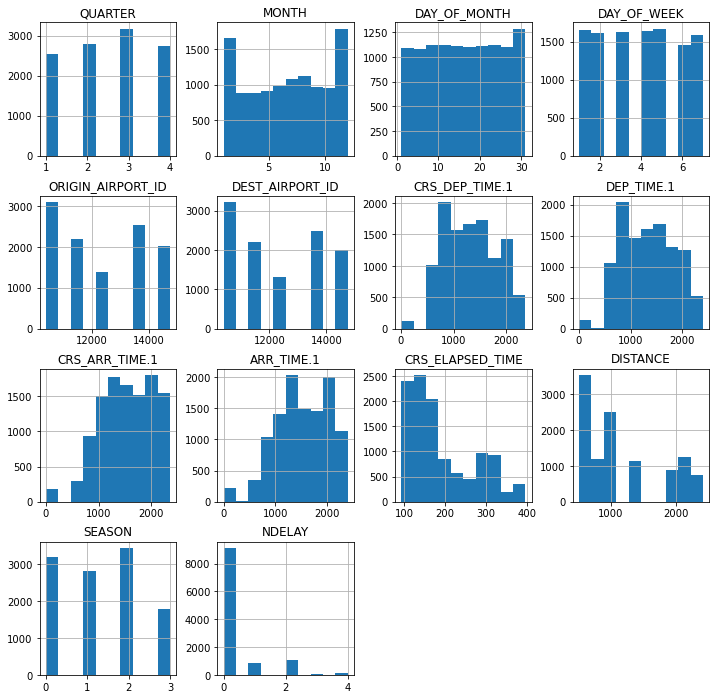

In [76]:
df2.hist(figsize=(12,12))

In [77]:
df2.NDELAY.value_counts()

0.0    9130
2.0    1035
1.0     878
4.0     114
3.0      74
Name: NDELAY, dtype: int64

# Spliting Dependent and Independent Variables

In [79]:
x=df1.drop(columns=["NDELAY","TAIL_NUM"])
y=df1.NDELAY

# Encoding Categorical columns to numerical

In [80]:
x["ORIGIN"].replace({"ATL":1,'DTW':2,'JFK':3,'MSP':4,'SEA':5},inplace=True)
x["DEST"].replace({"ATL":1,'DTW':2,'JFK':3,'MSP':4,'SEA':5},inplace=True)

In [81]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9aSkuMDufRQ-_cGNUoBz7Lt6oBI_rXUiZ_yao-U4oncs',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'flightdelayprediction-donotdelete-pr-ocgt3z2vhznocj'
object_key = 'X.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

x1 = pd.read_csv(body)
x1.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME.1,CRS_ARR_TIME.1,CRS_ELAPSED_TIME,DISTANCE,SEASON
0,1,1,1,5,1399,1,5,1905,2143,338,2182,2
1,1,1,1,5,1476,2,4,1345,1435,110,528,2
2,1,1,1,5,1597,1,5,940,1215,335,2182,2
3,1,1,1,5,1768,5,4,819,1335,196,1399,2
4,1,1,1,5,1823,5,2,2300,607,247,1927,2


In [82]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9aSkuMDufRQ-_cGNUoBz7Lt6oBI_rXUiZ_yao-U4oncs',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'flightdelayprediction-donotdelete-pr-ocgt3z2vhznocj'
object_key = 'Y.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

y2 = pd.read_csv(body)
y2.head()

,NDELAY
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [83]:
from sklearn.utils import shuffle
X,Y=shuffle(x1,y2,random_state=72)
X.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME.1,CRS_ARR_TIME.1,CRS_ELAPSED_TIME,DISTANCE,SEASON
5816,3,8,16,2,786,2,1,1400,1603,123,594,0
475,1,1,25,1,1173,4,2,830,1114,104,528,2
10952,2,6,25,2,2547,5,4,1894,16,197,1399,0
8363,4,11,14,1,1247,5,1,900,1653,293,2182,1
11452,1,2,19,2,1232,1,4,2079,2209,149,744,2


# Splitting Dataset as Training and Testing data

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y2,test_size=0.2,random_state=42)

In [85]:
x_train.shape,x_test.shape

((9856, 12), (2464, 12))

# Model Building

# DecisionTree

In [86]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
dc.score(x_test,y_test)

0.7568993506493507

# RandomForest

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=42)
rf.fit(x_train,y_train.values.ravel())
rf.score(x_test,y_test)

0.8368506493506493

In [88]:
x_train.shape,x_test.shape

((9856, 12), (2464, 12))

# Model Building

# Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
dc.score(x_test,y_test)

0.7495941558441559

# Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=42)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

/tmp/wsuser/ipykernel_164/905497165.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.8368506493506493

In [89]:
pd.DataFrame(rf.predict(x_test)).value_counts()

0.0    1881
1.0     223
2.0     213
4.0     106
3.0      41
dtype: int64

In [91]:
x_test.iloc[[99,21,22],:]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME.1,CRS_ARR_TIME.1,CRS_ELAPSED_TIME,DISTANCE,SEASON
8817,4,11,3,4,2787,4,1,1935,2308,153,907,1
12270,3,7,26,4,43,3,1,1525,1814,169,760,0
2894,2,4,1,5,1991,4,1,520,845,145,907,3


In [92]:
y_test.iloc[[8,21,912]]

,NDELAY
2318,0.0
12270,4.0
10061,1.0


In [93]:
rf.predict(x_test.iloc[[8,21,912],:])

array([0., 4., 0.])

In [94]:
pd.DataFrame(dc.predict(x_test)).value_counts()

0.0    1632
1.0     335
2.0     319
4.0     121
3.0      57
dtype: int64

# Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression(solver='sag')
lr1.fit(x_train,y_train.values.ravel())
lr1.score(x_test,y_test)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.6830357142857143

In [96]:
lr1.predict(x_test).sum()

0.0

# SVM

In [97]:
from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')
svm.fit(x_train,y_train.values.ravel())
svm.score(x_test,y_test)

0.6128246753246753

In [98]:
pd.DataFrame(svm.predict(x_test)).value_counts()

0.0    2167
2.0     230
4.0      67
dtype: int64

In [99]:
pd.DataFrame(y_test).value_counts()

NDELAY
0.0       1683
1.0        308
2.0        288
4.0        130
3.0         55
dtype: int64

# KNearestNeighborsClassifie

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.729301948051948

In [101]:
pd.DataFrame(knn.predict(x_test)).value_counts()

0.0    1942
2.0     222
1.0     197
4.0      82
3.0      21
dtype: int64

In [102]:
knn.predict(x_test.iloc[[8,21,912],:])

array([0., 0., 3.])

# Evaluation of Random Forest

Testing Sensitivity for Random Forest 0.9360230547550432
Testing Specificity for Random Forest 0.8716577540106952
Testing Precision for Random Forest 0.9854368932038835
Testing accuracy for Random Forest 0.8368506493506493


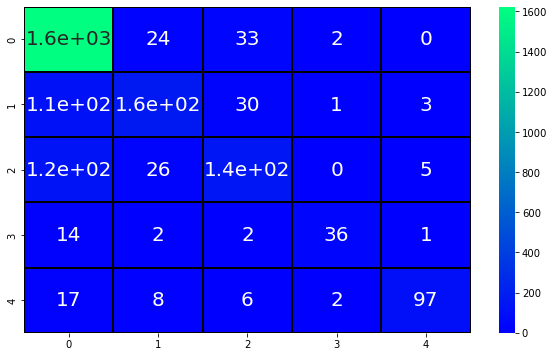

In [103]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
pred=rf.predict(x_test)
cm=confusion_matrix(y_test, pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
#print('Testing Accuracy for knn',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest',(TP/(TP+FN)))
print('Testing Specificity for Random Forest',(TN/(TN+FP)))
print('Testing Precision for Random Forest',(TP/(TP+FP)))
print('Testing accuracy for Random Forest',accuracy_score(y_test, pred))

In [104]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      1683
         1.0       0.73      0.53      0.61       308
         2.0       0.67      0.49      0.57       288
         3.0       0.88      0.65      0.75        55
         4.0       0.92      0.75      0.82       130

    accuracy                           0.84      2464
   macro avg       0.81      0.68      0.73      2464
weighted avg       0.83      0.84      0.83      2464



# Evaluation of Decision Tree

Testing Sensitivity for Random Forest 0.9360230547550432
Testing Specificity for Random Forest 0.8716577540106952
Testing Precision for Random Forest 0.9854368932038835
Testing accuracy for Random Forest 0.8368506493506493


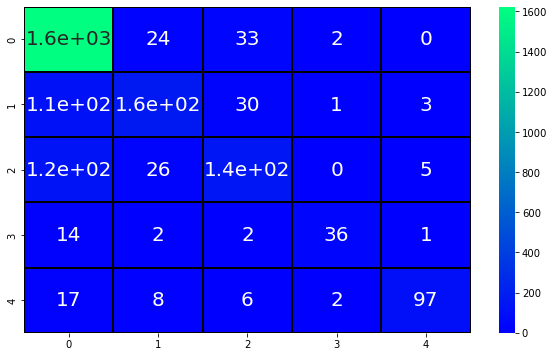

In [105]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
pred1=rf.predict(x_test)
cm=confusion_matrix(y_test, pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
#print('Testing Accuracy for knn',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest',(TP/(TP+FN)))
print('Testing Specificity for Random Forest',(TN/(TN+FP)))
print('Testing Precision for Random Forest',(TP/(TP+FP)))
print('Testing accuracy for Random Forest',accuracy_score(y_test, pred1))

In [112]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      1683
         1.0       0.73      0.53      0.61       308
         2.0       0.67      0.49      0.57       288
         3.0       0.88      0.65      0.75        55
         4.0       0.92      0.75      0.82       130

    accuracy                           0.84      2464
   macro avg       0.81      0.68      0.73      2464
weighted avg       0.83      0.84      0.83      2464



In [106]:
import pickle

In [107]:
pickle.dump(rf,open("rfmodel.pkl",'wb'))

In [108]:
pwd

'/home/wsuser/work'

Testing Accuracy for Decision Tree 0.8813370473537604
Testing Sensitivity for Decision Tree 0.9370491803278689
Testing Specificity for Decision Tree 0.5666666666666667
Testing Precision for Decision Tree 0.9243208279430789
Testing accuracy for Decision Tree 0.7495941558441559


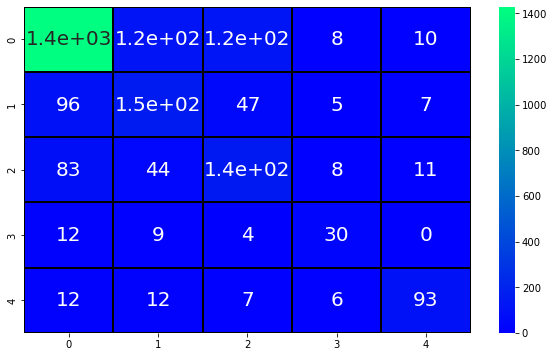

In [109]:
pred1=dc.predict(x_test)
cm1=confusion_matrix(y_test, pred1)
plt.figure(figsize=(10,6))
sns.heatmap(cm1, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm1[0][0]
TN=cm1[1][1]
FN=cm1[1][0]
FP=cm1[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Decision Tree',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree',(TN/(TN+FP)))
print('Testing Precision for Decision Tree',(TP/(TP+FP)))
print('Testing accuracy for Decision Tree',accuracy_score(y_test, pred1))

In [110]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      1683
         1.0       0.73      0.53      0.61       308
         2.0       0.67      0.49      0.57       288
         3.0       0.88      0.65      0.75        55
         4.0       0.92      0.75      0.82       130

    accuracy                           0.84      2464
   macro avg       0.81      0.68      0.73      2464
weighted avg       0.83      0.84      0.83      2464



# Evaluation of Decision Tree

Testing Sensitivity for Random Forest 0.9360230547550432
Testing Specificity for Random Forest 0.8716577540106952
Testing Precision for Random Forest 0.9854368932038835
Testing accuracy for Random Forest 0.8368506493506493


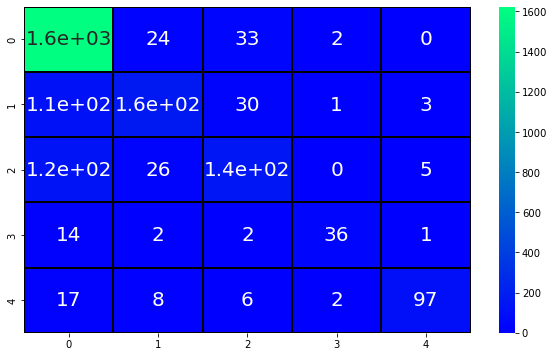

In [111]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
pred=rf.predict(x_test)
cm=confusion_matrix(y_test, pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
#print('Testing Accuracy for knn',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest',(TP/(TP+FN)))
print('Testing Specificity for Random Forest',(TN/(TN+FP)))
print('Testing Precision for Random Forest',(TP/(TP+FP)))
print('Testing accuracy for Random Forest',accuracy_score(y_test, pred))

In [112]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      1683
         1.0       0.46      0.50      0.48       308
         2.0       0.45      0.49      0.47       288
         3.0       0.53      0.55      0.54        55
         4.0       0.77      0.72      0.74       130

    accuracy                           0.75      2464
   macro avg       0.61      0.62      0.62      2464
weighted avg       0.76      0.75      0.75      2464



In [113]:
import pickle

In [114]:
pickle.dump(rf,open("rfmodel.pkl",'wb'))

In [123]:
pwd

'/home/wsuser/work'

# Deployment

In [115]:
!pip install -U ibm-watson-machine-learning

In [116]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

# Authenticate and Set Space

In [117]:
wml_cred = {
"apikey":"Y7PgzaolxWpOj7WDJSfSSlaKeKNEdrWLhIDda_wEt5Zc",
"url":"https://us-south.ml.cloud.ibm.com"
}

In [118]:
wml_clients=APIClient(wml_cred)
wml_clients.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----  ------------------------
ID                                    NAME   CREATED
494a45e5-4850-459e-b17d-b9e7752c659a  model  2022-11-14T09:56:56.056Z
------------------------------------  -----  ------------------------


In [119]:
space_id="494a45e5-4850-459e-b17d-b9e7752c659a"

In [120]:
wml_clients.set.default_space(space_id)

'SUCCESS'

In [121]:
wml_clients.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

# SAVE AND DEPLOY THE MODEL

In [141]:
import sklearn
sklearn.__version__

'1.0.2'

In [142]:
MODEL_NAME = 'Flight Delay Prediction'
DEPLOYMENT_NAME ='model'
DEMO_MODEL = rf

# Set Python Version

In [143]:
soft_sepc_id=wml_clients.software_specifications.get_id_by_name("runtime-22.1-py3.9")
soft_sepc_id

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

# Setup model name

In [144]:
model_props={
    wml_clients.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_clients.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    wml_clients.repository.ModelMetaNames.SOFTWARE_SPEC_UID: soft_sepc_id
    
}

# Save model

In [145]:
model_details = wml_clients.repository.store_model(
 model=rf,
    meta_props=model_props,
    training_data=x_train,
    training_target=y_train
)

In [132]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'NDELAY',
  'schemas': {'input': [{'fields': [{'name': 'QUARTER', 'type': 'int64'},
      {'name': 'MONTH', 'type': 'int64'},
      {'name': 'DAY_OF_MONTH', 'type': 'int64'},
      {'name': 'DAY_OF_WEEK', 'type': 'int64'},
      {'name': 'FL_NUM', 'type': 'int64'},
      {'name': 'ORIGIN', 'type': 'int64'},
      {'name': 'DEST', 'type': 'int64'},
      {'name': 'CRS_DEP_TIME.1', 'type': 'int64'},
      {'name': 'CRS_ARR_TIME.1', 'type': 'int64'},
      {'name': 'CRS_ELAPSED_TIME', 'type': 'int64'},
      {'name': 'DISTANCE', 'type': 'int64'},
      {'name': 'SEASON', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-14T15:13:03.464Z',
  'id': '34e94425-c938-4ab1-95f8-b2e4dee160f0',
  'modified_at': '2022-11-14T15:13:12.037Z',

In [146]:
model_uid = wml_clients.repository.get_model_id(model_details)
model_uid

'76f81f79-f5c2-41df-9ce0-a6f4978eac65'

In [147]:
#set meta
deployment_props = {
    wml_clients.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_clients.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [148]:
deployment=wml_clients.deployments.create(
artifact_uid=model_uid,
meta_props=deployment_props
)
deployment



#######################################################################################

Synchronous deployment creation for uid: '76f81f79-f5c2-41df-9ce0-a6f4978eac65' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='595b1b89-5a44-4182-8f21-9b737ac9ac86'
------------------------------------------------------------------------------------------------




{'entity': {'asset': {'id': '76f81f79-f5c2-41df-9ce0-a6f4978eac65'},
  'custom': {},
  'deployed_asset_type': 'model',
  'hardware_spec': {'id': 'e7ed1d6c-2e89-42d7-aed5-863b972c1d2b',
   'name': 'S',
   'num_nodes': 1},
  'name': 'model',
  'online': {},
  'space_id': '494a45e5-4850-459e-b17d-b9e7752c659a',
  'status': {'online_url': {'url': 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/595b1b89-5a44-4182-8f21-9b737ac9ac86/predictions'},
   'serving_urls': ['https://us-south.ml.cloud.ibm.com/ml/v4/deployments/595b1b89-5a44-4182-8f21-9b737ac9ac86/predictions'],
   'state': 'ready'}},
 'metadata': {'created_at': '2022-11-14T15:35:39.844Z',
  'id': '595b1b89-5a44-4182-8f21-9b737ac9ac86',
  'modified_at': '2022-11-14T15:35:39.844Z',
  'name': 'model',
  'owner': 'IBMid-662003VA5U',
  'space_id': '494a45e5-4850-459e-b17d-b9e7752c659a'},
 'system': {'warnings': [{'id': 'Deprecated',
    'message': 'online_url is deprecated and will be removed in a future release. Use serving_urls ins